# 패키지 및 데이터 임포트

데이터 출처: https://www.kaggle.com/loveall/appliances-energy-prediction

In [ ]:
! pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 1.6 MB 11.8 MB/s 


In [ ]:
#패키지 임포트
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
set_log_level("ERROR")


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
#구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기

filepath = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv'
data = pd.read_csv(filepath, index_col='ymdhm', parse_dates=['ymdhm'])
data

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [ ]:
data.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.0,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.036770,345.631700,329.232797,746.826551,316.071760,0.0,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317791,174.250734,76.559900,1077.388189,67.495669,0.0,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,-222.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,0.0,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,0.0,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,0.0,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


# data shift 하고 train, test 데이터 나누기

In [ ]:
sub = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)

In [ ]:
sub.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [ ]:
data.sort_index(inplace=True)
sub.sort_index(inplace=True)

In [ ]:
label = data.loc[:,sub.columns]
data = data.drop(sub.columns,axis=1)

In [ ]:
label

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
data

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0


In [ ]:
# data와 label 하나 밀어주기 (과거데이터를 사용해야 함으로)
y = label.reset_index(drop=True)
X = data.reset_index(drop=True)

X.index += 1

tot=pd.concat((X,y),axis=1)
tot=tot.sort_index()

tot=tot.iloc[1:-1]

label = tot.loc[:,sub.columns]
data = tot.drop(sub.columns,axis=1)

In [ ]:
train_label=label.iloc[:-len(sub),:]
test_label=label.iloc[-len(sub):,:]

train_data=data.iloc[:-len(sub),:]
test_data=data.iloc[-len(sub):,:]

In [ ]:
train_data # ~2022-05-31까지

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
1,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
3,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
4,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
5,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269419,25.180,140.89,217.99,26.01,140.89,232.0,314.01,0.0,597.98,471.08,0.0,0.0,0.0
269420,25.180,140.94,217.99,26.01,140.94,220.0,285.72,0.0,575.57,493.58,0.0,0.0,0.0
269421,25.180,141.07,217.99,26.01,141.07,208.0,274.78,0.0,501.04,505.03,0.0,0.0,0.0
269422,25.180,141.01,217.99,26.01,141.01,196.0,269.40,0.0,425.89,505.03,0.0,0.0,0.0


In [ ]:
test_data # 2022-06-01 ~

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
269424,25.19,140.56,218.36,25.64,140.56,173.0,269.40,0.0,70.09,482.26,0.0,0.0,0.0
269425,25.19,140.60,218.36,25.64,140.60,162.0,269.40,0.0,8.23,471.08,0.0,0.0,0.0
269426,25.19,140.78,218.36,25.64,140.78,151.0,280.22,0.0,28.82,449.12,0.0,0.0,0.0
269427,25.20,755.90,218.73,25.27,140.90,141.0,296.87,0.0,12.35,417.17,0.0,0.0,0.0
269428,25.19,0.00,218.36,25.64,140.94,130.0,302.53,0.0,53.52,386.43,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,25.04,865.96,212.86,31.14,259.30,528.0,319.84,0.0,25.27,926.70,0.0,0.0,0.0
276332,25.04,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0
276333,25.04,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0
276334,25.04,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0


In [ ]:
#데이터 칼럼 확인
train_data.columns

Index(['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662',
       'fw_1018680', 'fw_1018683', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140'],
      dtype='object')

In [ ]:
#독립변수 정의
col_lst = ['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662',
       'fw_1018680', 'fw_1018683', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140']

In [ ]:
col_lst

['swl',
 'inf',
 'sfw',
 'ecpc',
 'tototf',
 'tide_level',
 'fw_1018662',
 'fw_1018680',
 'fw_1018683',
 'fw_1019630',
 'rf_10184100',
 'rf_10184110',
 'rf_10184140']

In [ ]:
train_label

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
5,311.7,301.2,291.0,277.3
...,...,...,...,...
269419,281.7,281.2,278.0,271.3
269420,279.7,279.2,278.0,272.3
269421,278.7,277.2,277.0,272.3
269422,277.7,276.2,276.0,271.3


In [ ]:
m = NeuralProphet(
    n_forecasts=48, #8시간 예측
    n_lags = 6, #1시간 뒤 regressor 지연 반영
    weekly_seasonality=3, #주간 계절성 설정
    daily_seasonality=5, #일간 계절성 설정
    d_hidden=128, #은닉층 뉴런 설정
    learning_rate=0.01, #학습률 설정
    batch_size=128, #배치 사이즈 설정
    epochs=200, #학습 횟수
)

#독립 변인(변수) 추가 및 정규화
m = m.add_lagged_regressor(names=col_lst, normalize="minmax") 

#학습 수행
metrics = m.fit(train_data, freq='h', validation_df=test_data, progress='plot')

ValueError: ignored

In [ ]:
metrics.tail(3)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
197,0.045582,60.638025,100.310728,0.0,0.032558,60.604958,82.150871
198,0.045581,60.637086,100.324994,0.0,0.032568,60.621944,82.163673
199,0.045580,60.639005,100.322870,0.0,0.032569,60.623623,82.164474


In [ ]:
#metric 확인
print("SmoothL1Loss: ", metrics.SmoothL1Loss.tail(1).item())
print("MAE(Train): ", metrics.MAE.tail(1).item())
print("MAE(Test): ", metrics.MAE_val.tail(1).item())

SmoothL1Loss:  0.04558048342155693
MAE(Train):  60.63900480954208
MAE(Test):  60.62362289428711


In [ ]:
#학습 선 그래프 생성
px.line(metrics, y=['MAE', 'MAE_val'], width=800, height=400)

# 시각화 검증

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py:2303: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py:2311: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`




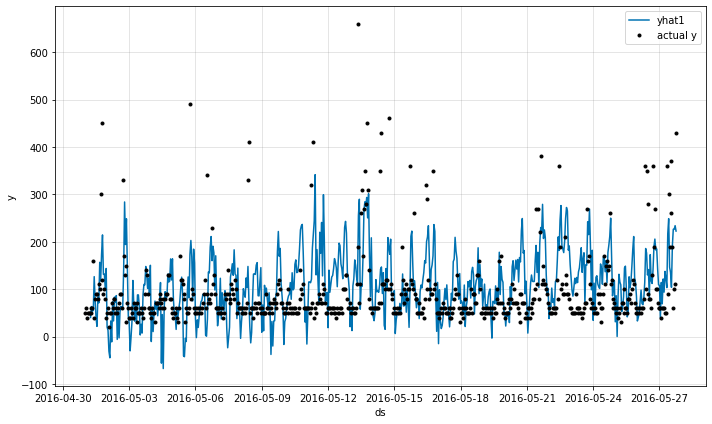

In [ ]:
#yhat1과 실제값 시각화
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

In [ ]:
#예측 결과 데이터 shape
forecast.shape

(643, 1445)

In [ ]:
#예측 결과 확인
forecast.tail()

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,lagged_regressor_rv242,lagged_regressor_rv243,lagged_regressor_rv244,lagged_regressor_rv245,lagged_regressor_rv246,lagged_regressor_rv247,lagged_regressor_rv248,trend,season_weekly,season_daily
638,2016-05-27 14:00:00,190.0,191.508499,1.508499,172.950317,-17.049683,178.743759,-11.256241,85.560143,-104.439857,...,29.718035,263.488342,-98.943329,-84.934128,174.652237,-139.709915,245.809311,-8.167961,12.302704,19.811781
639,2016-05-27 15:00:00,60.0,226.40564,166.40564,169.667908,109.667908,211.925186,151.925186,145.062973,85.062973,...,-50.371414,240.824371,-6.446191,-13.850264,53.783688,-223.401718,467.809692,-8.157019,13.15358,7.7001
640,2016-05-27 16:00:00,100.0,226.368774,126.368774,122.213936,22.213936,213.725296,113.725296,167.959473,67.959473,...,48.872665,184.862991,-3.12691,-36.842178,212.544342,-89.574287,386.181763,-8.146078,13.924565,10.634538
641,2016-05-27 17:00:00,110.0,234.052521,124.052521,187.962051,77.962051,232.975784,122.975784,192.876343,82.876343,...,183.813034,244.791077,-68.857811,-87.956619,381.480133,-109.229935,420.790222,-8.135136,14.606512,34.392021
642,2016-05-27 18:00:00,430.0,222.664764,-207.335236,181.440201,-248.559799,219.109375,-210.890625,143.934219,-286.065781,...,158.641495,289.580109,-87.451324,-36.855949,184.309723,-201.262909,592.438354,-8.124195,15.191098,62.259884


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py:2303: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py:2311: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`




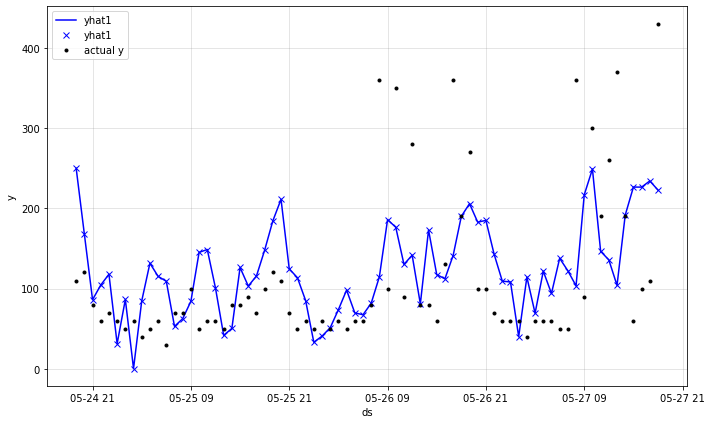

In [ ]:
forecast = m.predict(test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-3*24:]) #3일간 데이터 확인

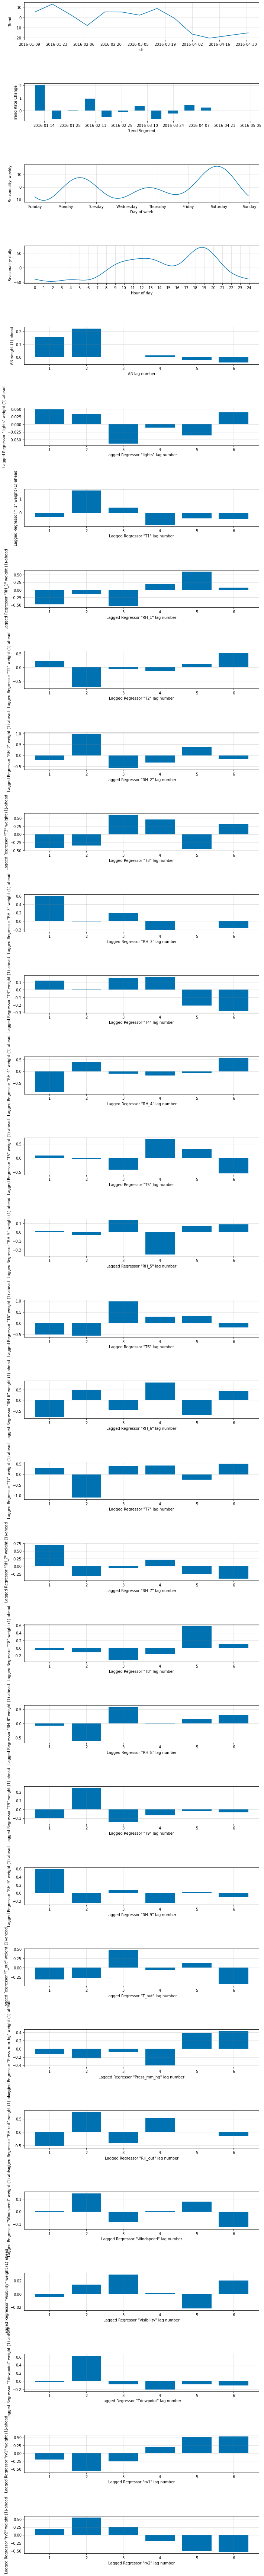

In [ ]:
fig_param = m.plot_parameters()